The dataset contains two folders, whereas one contains the data for the controls and one for the condition group. For each patient a csv file has been provided containing the actigraph data collected over time. The columns are: timestamp (one minute intervals), date (date of measurement), activity (activity measurement from the actigraph watch). In addition, the MADRS scores provided in the file "scores.csv". **It contains the following columns; number (patient identifier), days (number of days of measurements), gender (1 or 2 for female or male), age (age in age groups), afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I), melanch (1: melancholia, 2: no melancholia), inpatient (1: inpatient, 2: outpatient), edu (education grouped in years), marriage (1: married or cohabiting, 2: single), work (1: working or studying, 2: unemployed/sick leave/pension), madrs1 (MADRS score when measurement started), madrs2 (MADRS when measurement stopped).**

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

depression_dataset = pd.read_csv("scores.csv")
df = depression_dataset.copy()
df.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [34]:
print(f" Veri setinin boyut sayısı: {df.ndim}\n",
     f"Veri setinin boyut bilgisi: {df.shape}\n",
     f"Veri setindeki toplam eleman sayısı: {df.size}\n")

 Veri setinin boyut sayısı: 2
 Veri setinin boyut bilgisi: (55, 12)
 Veri setindeki toplam eleman sayısı: 660



In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
days,55.0,12.600000,2.491467,5.0,13.0,13.0,13.0,20.0
gender,55.0,1.454545,0.502519,1.0,1.0,1.0,2.0,2.0
afftype,23.0,1.739130,0.540824,1.0,1.0,2.0,2.0,3.0
melanch,20.0,1.950000,0.223607,1.0,2.0,2.0,2.0,2.0
inpatient,23.0,1.782609,0.421741,1.0,2.0,2.0,2.0,2.0
marriage,23.0,1.521739,0.510754,1.0,1.0,2.0,2.0,2.0
work,23.0,1.869565,0.344350,1.0,2.0,2.0,2.0,2.0
madrs1,23.0,22.739130,4.797892,13.0,18.5,24.0,26.0,29.0
madrs2,23.0,20.000000,4.729021,11.0,16.0,21.0,24.5,28.0


In [37]:
df.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [38]:
print(f"Number değerleri:\n{df['number'].value_counts()}")
print("-" * 20)
print(f"Days değerleri:\n{df['days'].value_counts()}")
print("-" * 20)
print(f"Gender değerleri:\n{df['gender'].value_counts()}")
print("-" * 20)
print(f"Age değerleri:\n{df['age'].value_counts()}")
print("-" * 20)
print(f"Afftype değerleri:\n{df['afftype'].value_counts()}")
print("-" * 20)
print(f"Melanch değerleri:\n{df['melanch'].value_counts()}")
print("-" * 20)
print(f"İnpatient değerleri:\n{df['inpatient'].value_counts()}")
print("-" * 20)
print(f"Edu değerleri:\n{df['edu'].value_counts()}")
print("-" * 20)
print(f"Marriage değerleri:\n{df['marriage'].value_counts()}")
print("-" * 20)
print(f"Work değerleri:\n{df['work'].value_counts()}")
print("-" * 20)
print(f"Madrs1 değerleri:\n{df['madrs1'].value_counts()}")
print("-" * 20)
print(f"Madrs2 değerleri:\n{df['madrs2'].value_counts()}")
print("-" * 20)

Number değerleri:
condition_1     1
control_19      1
control_8       1
control_9       1
control_10      1
control_11      1
control_12      1
control_13      1
control_14      1
control_15      1
control_16      1
control_17      1
control_18      1
control_20      1
control_6       1
control_21      1
control_22      1
control_23      1
control_24      1
control_25      1
control_26      1
control_27      1
control_28      1
control_29      1
control_30      1
control_31      1
control_7       1
control_5       1
condition_2     1
condition_14    1
condition_3     1
condition_4     1
condition_5     1
condition_6     1
condition_7     1
condition_8     1
condition_9     1
condition_10    1
condition_11    1
condition_12    1
condition_13    1
condition_15    1
control_4       1
condition_16    1
condition_17    1
condition_18    1
condition_19    1
condition_20    1
condition_21    1
condition_22    1
condition_23    1
control_1       1
control_2       1
control_3       1
control_32

#### Aykırı değere ait bir sıkıntı yok gibi. Sonuö olarak değerlere baktığımız zaman hem az veriye sahip hem de tam olarak ilişkili değiller dolayısıyla aykırı değer yapısı için bir işlem gerçekleştirmeyeceğiz fakat null değerler için zaten veri de az olduğundan bir işlemler silsilesi gerçekleştireceğiz. Ortalam al veya sıfırla doldurmak yerine x'den bir önceki değeri al gibi temel uygulamaları gerçekleştireceğim...

In [39]:
# pip install missingno

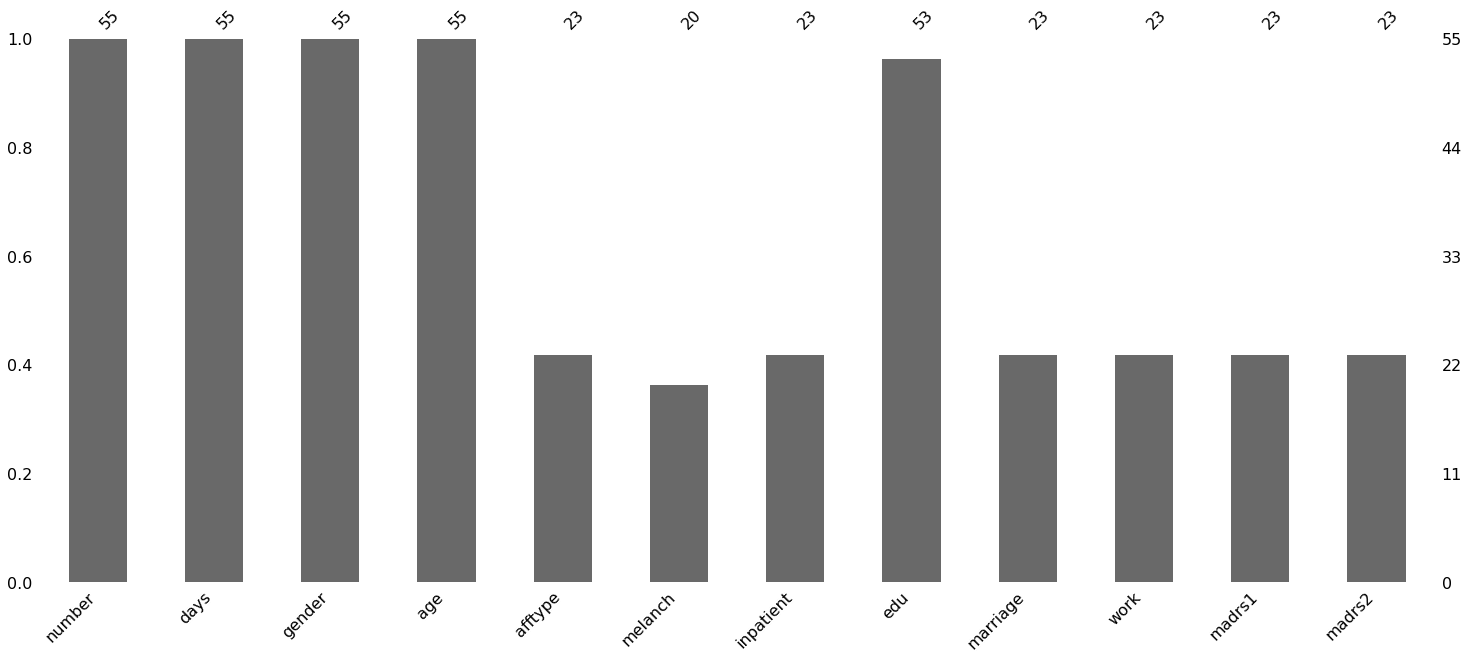

In [40]:
import missingno as ms
ms.bar(df)
plt.show()

#### Burada eksik değerlerin varlığına dair bir görselleştirme gerçekleştirdik. Dolayısıyla bunun için 'missingno' kütüphanesini ilk olarak indirip ardından projeye dahil ettim. Şu anda eksik değerler daha açık gözüküyor.

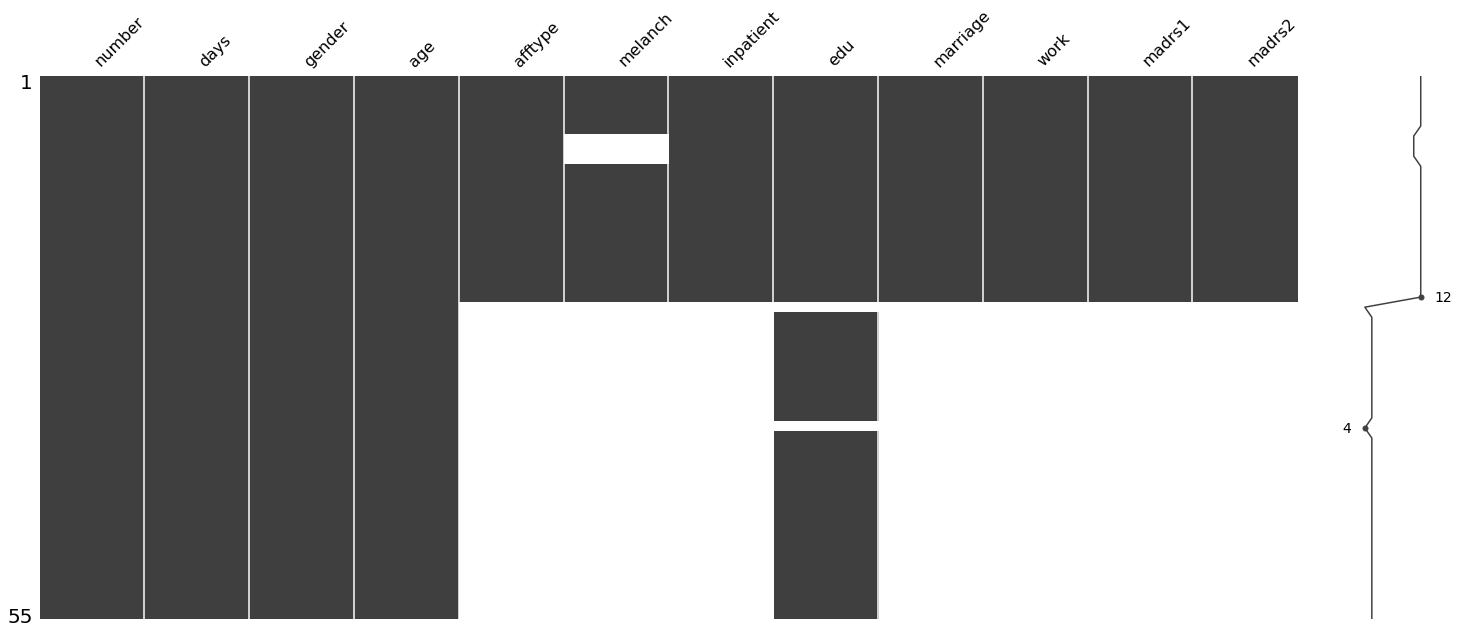

In [41]:
ms.matrix(df)
plt.show()

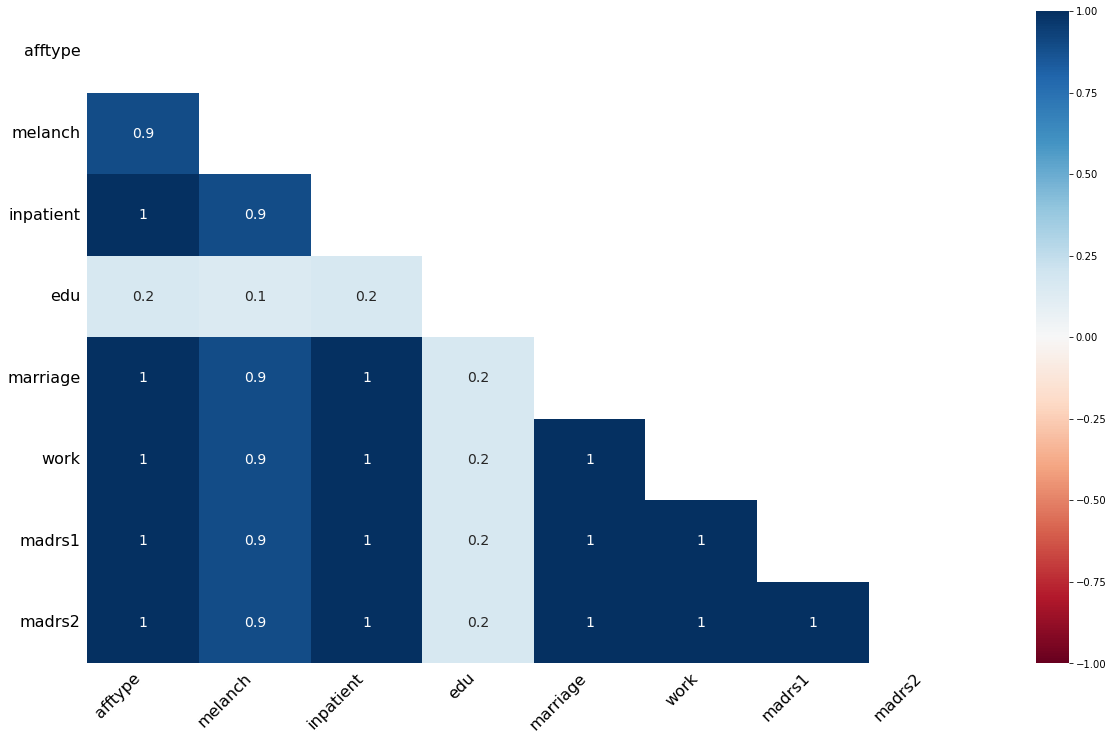

In [42]:
ms.heatmap(df)
plt.show()

#### Yine 'NaN' değerlerin somut olarak gösterimleri. Bu grafiklerden yola çıkarak şimdi eksik değerler üzerinden işlemler yapacağım...

#### Şimdi burada değişkenleri gözlemleyerek bazılarını ortalama ile bazılarını sıfır ile doldurma veya silme işlemi gerçekleştireceğim..

In [43]:
df.head(10)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [44]:
df[df.isnull().any(axis=1)]

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
23,control_1,8,2,25-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,control_2,20,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
25,control_3,12,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
26,control_4,13,1,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
27,control_5,13,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
28,control_6,13,1,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
29,control_7,13,1,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN


#### Gözlemlediğimiz zaman eksik değerlerin sadece 'number' değişkenindeki 'control' değerlerinde var olduğunu görüyoruz. Yani bir bakıma büyük ihtimalle 'control' değerlerinde bu değişkenlere ihtiyaç duyulmamış olabilir. Yani veri hakkında daha fazla gözlem yapıp ona göre muamele gerçekleştirilmesi en doğrusu olacaktır.. Ancak ders ve öğrenme projesi olduğu için ben bu değerlere uygulama yapacağım..

In [45]:
df['afftype'].fillna(0, inplace=True)
df['afftype'][23:40]

23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
Name: afftype, dtype: float64

#### İlk olarak "afftype" yani kişilerin bipolar olup olmadığını gözlemlediğimiz veri üzerinden ilerledim. Bu değerlere sıfır atamamın sebebi zaten 'condition'da bireylere teshiş'in konulmasından mütevellit. Bunun yanı sıra 0 olmasıyla birlikte ya bipolardır ya değildir sorgulamasına bilinmiyor yapısını da katabilir.

In [46]:
df["melanch"].fillna(0, inplace = True)
df["melanch"][25:40]

25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
Name: melanch, dtype: float64

In [47]:
df['inpatient'].fillna(0, inplace=True)
df['inpatient'][23:40]

23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
Name: inpatient, dtype: float64

In [48]:
df['marriage'].fillna(0, inplace=True)
df['marriage'][23:40]

23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
Name: marriage, dtype: float64

In [49]:
df['work'].fillna(0, inplace=True)
df['work'][23:40]

23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
Name: work, dtype: float64

In [50]:
df['madrs1'].fillna(df["madrs1"].mean(), inplace = True)
df['madrs1'][23:40]

23    22.73913
24    22.73913
25    22.73913
26    22.73913
27    22.73913
28    22.73913
29    22.73913
30    22.73913
31    22.73913
32    22.73913
33    22.73913
34    22.73913
35    22.73913
36    22.73913
37    22.73913
38    22.73913
39    22.73913
Name: madrs1, dtype: float64

In [51]:
df['madrs2'].fillna(df["madrs2"].mean(), inplace = True)
df['madrs2'][23:40]

23    20.0
24    20.0
25    20.0
26    20.0
27    20.0
28    20.0
29    20.0
30    20.0
31    20.0
32    20.0
33    20.0
34    20.0
35    20.0
36    20.0
37    20.0
38    20.0
39    20.0
Name: madrs2, dtype: float64

In [52]:
df.isnull().sum()

number       0
days         0
gender       0
age          0
afftype      0
melanch      0
inpatient    0
edu          2
marriage     0
work         0
madrs1       0
madrs2       0
dtype: int64

#### Evet böylelikle sadece bir ve ikilerden oluşan verilerin 'control' parametresine sıfır atadım. 'madrs1' ve 'madrs2' verilerini ise ortalamalar ile doldurdum. Yukarıda da bahsettiğim gibi bu işlemlerin gerekliliği tartışılabilir ve araştırmaya açıktır. Fakat uygulama ve öğrenme projesinde bunları atlamak istemedim.

In [53]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df["age"])

df_new = pd.get_dummies(df, columns=["age"], prefix = ["age"])
df_new.head()

,number,days,gender,afftype,melanch,inpatient,edu,marriage,work,madrs1,...,age_20-24,age_25-29,age_30-34,age_35-39,age_40-44,age_45-49,age_50-54,age_55-59,age_60-64,age_65-69
0,condition_1,11,2,2.0,2.0,2.0,6-10,1.0,2.0,19.0,...,0,0,0,1,0,0,0,0,0,0
1,condition_2,18,2,1.0,2.0,2.0,6-10,2.0,2.0,24.0,...,0,0,0,0,1,0,0,0,0,0
2,condition_3,13,1,2.0,2.0,2.0,6-10,2.0,2.0,24.0,...,0,0,0,0,0,1,0,0,0,0
3,condition_4,13,2,2.0,2.0,2.0,11-15,1.0,1.0,20.0,...,0,1,0,0,0,0,0,0,0,0
4,condition_5,13,2,2.0,2.0,2.0,11-15,2.0,2.0,26.0,...,0,0,0,0,0,0,1,0,0,0


#### Evet ek olarak burada bir dönüşüm işlemi gerçekleştirdik. Kategorik değişken olarak 'age' sütununu verimizde kullanmak ve modelimize dahil etmek için numeric bir yapıya çevirdik. Şimdi burada bahsetmek istediğim bir kaç nokta var. İlk olarak dönüşüm işlemini LabelEncoder() fonksiyonuyla sağlıyoruz. Bizim 'age' kategorik değişkenimiz ikiden fazla parametre barındırdığı için bu işlem 1,2,3,4 ... şeklinde sayısal değer atamasıyla devam edecek. Fakat burada dummy tuzağını engellemek için de 'get_dummies' yapısını uyguluyoruz. Genel mantık ise hangi değer varsa 1 olarak geçiyor diğerleri ise 0 olarak geçiyor. 

In [54]:
df_new.drop(["number", "edu"], axis = 1, inplace = True)

In [55]:
df_new.head()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2,age_20-24,age_25-29,age_30-34,age_35-39,age_40-44,age_45-49,age_50-54,age_55-59,age_60-64,age_65-69
0,11,2,2.0,2.0,2.0,1.0,2.0,19.0,19.0,0,0,0,1,0,0,0,0,0,0
1,18,2,1.0,2.0,2.0,2.0,2.0,24.0,11.0,0,0,0,0,1,0,0,0,0,0
2,13,1,2.0,2.0,2.0,2.0,2.0,24.0,25.0,0,0,0,0,0,1,0,0,0,0
3,13,2,2.0,2.0,2.0,1.0,1.0,20.0,16.0,0,1,0,0,0,0,0,0,0,0
4,13,2,2.0,2.0,2.0,2.0,2.0,26.0,26.0,0,0,0,0,0,0,1,0,0,0


#### Evet son olarak iki kategorisel değişkenimizi de yok ederek veri setini makine öğrenmesine uygun hale getirmiş oldum. Sadece sayısal değişkenler mevcut.. Artık bağımlı ve bağımsız değişkenlerimizi belirleyebilir ardından modellere geçebiliriz..

In [56]:
df_new["madrs3"] = df_new["madrs1"] - df["madrs2"]
df_new.head(10)

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2,age_20-24,age_25-29,age_30-34,age_35-39,age_40-44,age_45-49,age_50-54,age_55-59,age_60-64,age_65-69,madrs3
0,11,2,2.0,2.0,2.0,1.0,2.0,19.0,19.0,0,0,0,1,0,0,0,0,0,0,0.0
1,18,2,1.0,2.0,2.0,2.0,2.0,24.0,11.0,0,0,0,0,1,0,0,0,0,0,13.0
2,13,1,2.0,2.0,2.0,2.0,2.0,24.0,25.0,0,0,0,0,0,1,0,0,0,0,-1.0
3,13,2,2.0,2.0,2.0,1.0,1.0,20.0,16.0,0,1,0,0,0,0,0,0,0,0,4.0
4,13,2,2.0,2.0,2.0,2.0,2.0,26.0,26.0,0,0,0,0,0,0,1,0,0,0,0.0
5,7,1,2.0,2.0,2.0,1.0,2.0,18.0,15.0,0,0,0,1,0,0,0,0,0,0,3.0
6,11,1,1.0,0.0,2.0,2.0,1.0,24.0,25.0,1,0,0,0,0,0,0,0,0,0,-1.0
7,5,2,2.0,0.0,2.0,1.0,2.0,20.0,16.0,0,1,0,0,0,0,0,0,0,0,4.0
8,13,2,1.0,0.0,2.0,1.0,2.0,26.0,26.0,0,0,0,0,0,1,0,0,0,0,0.0
9,9,2,2.0,2.0,2.0,1.0,2.0,28.0,21.0,0,0,0,0,0,1,0,0,0,0,7.0


#### Burada bağımsız değişkne olarak alacağım "madrs" puanı için bir işlem gerçekleştirdim. İlk olarak tepedeki veri seti açıklamasında 'madrs1'in bu ölçüm başladığında kişiden alınan puan olduğu 'madrs2'nin ise ölçüm bittiğinde kullanıcıda var olan puan olduğu belirtiliyor. Dolayısıyla iki ölçümün farkının ölçülen kişi için niteleyici bir değer taşıdığını düşünmemden mütevellit bu işlemi gerçekleştirdim. Şimdi bu değerleri silip işlemleri 'madrs3' üzerinden ilerleteceğim...

In [57]:
y_df = df_new[["madrs3"]]
df_new.drop(["madrs1", "madrs2", "madrs3"], axis = 1, inplace = True)
X_df = df_new

In [58]:
X_df.head()

,days,gender,afftype,melanch,inpatient,marriage,work,age_20-24,age_25-29,age_30-34,age_35-39,age_40-44,age_45-49,age_50-54,age_55-59,age_60-64,age_65-69
0,11,2,2.0,2.0,2.0,1.0,2.0,0,0,0,1,0,0,0,0,0,0
1,18,2,1.0,2.0,2.0,2.0,2.0,0,0,0,0,1,0,0,0,0,0
2,13,1,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,1,0,0,0,0
3,13,2,2.0,2.0,2.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0
4,13,2,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,1,0,0,0


In [59]:
y_df.head()

,madrs3
0,0.0
1,13.0
2,-1.0
3,4.0
4,0.0


In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.30, random_state = 42)

### Lasso Regresyon Modelleme

#### Model ve tahmin bölümü:

In [61]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
print(lasso_model.coef_) #Katsayılar..
print("-"*20)
print(lasso_model.intercept_) #Sabitler

[-0.00465593  0.73493616 -2.59659097 -0.26487977 -0.72882949  1.50801575
  1.92480657  0.          0.          0.          0.          0.37100519
 -0.         -0.         -0.          0.         -0.        ]
--------------------
[1.75305313]


In [62]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# İlkel tahmin modelimiz: 3.3752907578513645

2.311594984671114

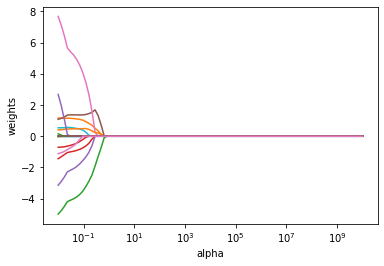

In [64]:
lasso = Lasso()
lambdas = 10 ** np.linspace(10,-2,100) * 0.5
katsayilar = []

for i in lambdas:
    lasso.set_params(alpha=i)
    lasso.fit(X_train,y_train)
    katsayilar.append(lasso.coef_)

ax = plt.gca()
ax.plot(lambdas * 2, katsayilar)
ax.set_xscale('log')
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.show()

#### Model Tunning bölümü:

In [65]:
from sklearn.linear_model import LassoCV
lasso = MultiTaskLassoCV().fit(X_train, y_train)
# ?lasso
lasso_params = {"n_alphas": [1,5,10,20,50,100],
               "max_iter": [1000,3000,7000,10000]}
lasso_cv_model = GridSearchCV(lasso, lasso_params, cv = 10, n_jobs=-1, verbose=2)
lasso_cv_model.fit(X_train, y_train)
print(f"En iyi parametreler: {str(lasso_cv_model.best_params_)}")

Fitting 10 folds for each of 24 candidates, totalling 240 fits
En iyi parametreler: {'max_iter': 1000, 'n_alphas': 5}


In [86]:
from sklearn.linear_model import LassoCV
lasso_tuned = LassoCV(max_iter=1000, n_alphas=5, ).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.0099735403956025

### Classification and Regression Trees - CART Modelleme

#### Model ve tahmin bölümü:

In [67]:
from sklearn.tree import DecisionTreeRegressor

cart_model = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.7865221840769436

#### Model Tunning bölümü:

In [72]:
# ?cart_model

cart_model = DecisionTreeRegressor().fit(X_train, y_train)
cart_params = {"max_depth": [1,2,3,5,10],
              "min_samples_split": [2, 5, 10, 20, 50],
              "min_samples_leaf": [2, 5, 10, 20, 50]}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv= 10, n_jobs=-1, verbose=2).fit(X_train, y_train)
print(f"En iyi parametrelerimiz: {str(cart_cv_model.best_params_)}")

Fitting 10 folds for each of 125 candidates, totalling 1250 fits
En iyi parametrelerimiz: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 50}


In [73]:
cart_tuned = DecisionTreeRegressor(max_depth=1, min_samples_split=2, min_samples_leaf=50).fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.0099735403956025

### Random Forests - RF Modeli

#### Model ve Tahmin Bölümü:

In [75]:
from sklearn.ensemble import RandomForestRegressor
from warnings import filterwarnings
filterwarnings('ignore')
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.3601547009438626

#### Model Tunning bölümü:

In [76]:
# ?rf_model
rf_params = {'max_depth': list(range(1,10)),
             'max_features': [3,5,10,20,50],
             'n_estimators': [100,200,500,1000,2000]}
rf_model_cv = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
print(f"En iyi parametreler: {str(rf_model_cv.best_params_)}")

Fitting 10 folds for each of 225 candidates, totalling 2250 fits
En iyi parametreler: {'max_depth': 1, 'max_features': 3, 'n_estimators': 100}


In [77]:
rf_tuned = RandomForestRegressor(max_depth=1, max_features=3, n_estimators = 100)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.0042316448633275

### Gradient Boosting Machines - GBM Modeli

#### Model ve Tahmin bölümü:

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
#Modeli kurup fit ediyoruz
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
#Ardından tahmin yapısını oluşturup ilkel karşılaştırma sonucunu elde ediyoruz.
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.282629665508601

#### Model Tunning Bölümü:

In [81]:
gbm_params = {"learning_rate": [0.001,0.01,0.1,0.2],
             "max_depth": [3,5,10,50,100],
             "n_estimators": [200,500,1000,2000],
             "subsample": [1,0.5,0.75]}
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs=-1, verbose=2).fit(X_train, y_train)
print(f"En iyi parametrelerimiz: {str(gbm_cv_model.best_params_)}")

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
En iyi parametrelerimiz: {'learning_rate': 0.001, 'max_depth': 100, 'n_estimators': 200, 'subsample': 0.5}


In [82]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.001, max_depth=100, n_estimators=200, subsample=0.5)
gbm_tuned.fit(X_train, y_train)
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.0499438318763294

In [89]:
lasso_predict = lasso_tuned.predict(X_test)
cart_predict = cart_tuned.predict(X_test)
rf_predict = rf_tuned.predict(X_test)
gbm_predict = gbm_tuned.predict(X_test)

#### Tune edilmiş modeller üzerinde bir kaç metriğin toplu halde sorgulanması;

In [92]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
predict = [lasso_predict, cart_predict, rf_predict, gbm_predict]
algoritma_adlari = ["Lasso Regresypn","Cart Regresyon","Random Forests Regresyon", "Gradient Boosting Regresyon"]
def metrics(y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    data = [mae, mse, rmse, r2]
    return data
seriler = []
metric_s = ["Mean Absolute Error", "Mean squared Error", "Root Mean Squared Error", "R2"]
for i in predict:
    data = metrics(i)
    seriler.append(data)
df_df = pd.DataFrame(data=seriler, index=algoritma_adlari, columns = metric_s)
pd.set_option('display.colheader_justify', 'center')

print(df_df.to_string())

                             Mean Absolute Error  Mean squared Error  Root Mean Squared Error     R2   
Lasso Regresypn                   1.083255             4.039994              2.009974         -0.017395
Cart Regresyon                    1.083255             4.039994              2.009974         -0.017395
Random Forests Regresyon          1.083853             4.016944              2.004232         -0.011591
Gradient Boosting Regresyon       1.098019             4.202270              2.049944         -0.058261
